In [2]:
import torch
import os
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [3]:
class ImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.class_name = {}

        for label, class_dir in enumerate(os.listdir(image_dir)):
            self.class_name[label] = class_dir
            class_path = os.path.join(image_dir, class_dir)
            for img_name in os.listdir(class_path):
                self.image_paths.append(os.path.join(class_path, img_name))
                self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

In [4]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
])

In [5]:
train_image_dir = '/home/td/Doc/Prog/Ai|Ml/pytorch/Dataset/merged_dataset/train'
test_image_dir = '/home/td/Doc/Prog/Ai|Ml/pytorch/Dataset/merged_dataset/test'

train_image_dataset = ImageDataset(image_dir=train_image_dir, transform=transform)
test_image_dataset = ImageDataset(image_dir=test_image_dir, transform=transform)

In [6]:
train_image_loader = DataLoader(dataset=train_image_dataset, batch_size=32, shuffle=True)
test_image_loader = DataLoader(dataset=test_image_dataset, batch_size=32, shuffle=True)

In [7]:
for images,labels in train_image_loader:
    print(images.shape, labels.shape)
    break

torch.Size([32, 3, 128, 128]) torch.Size([32])


In [8]:
for images, labels in train_image_loader:
    print(images.shape, labels.shape)
    break

torch.Size([32, 3, 128, 128]) torch.Size([32])


In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
print(train_image_dataset.class_name)
print(test_image_dataset.class_name)

{0: 'dog', 1: 'cat', 2: 'person'}
{0: 'dog', 1: 'cat', 2: 'person'}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.75686276].


torch.Size([32, 3, 128, 128]) torch.Size([32])
(3, 128, 128)
cat
(128, 128, 3)
1


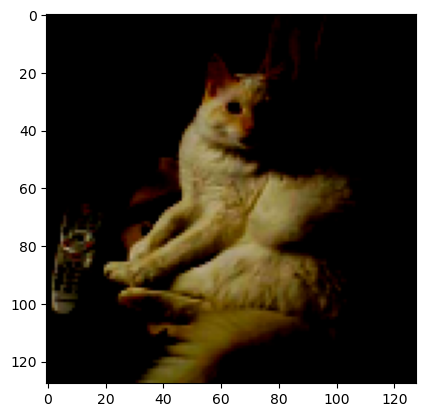

In [11]:
for images, labels in train_image_loader:
    print(images.shape, labels.shape)
    img = images[0].numpy()
    print(img.shape)
    label = labels[0].item()
    print(train_image_dataset.class_name[label])
    img = np.transpose(img, (1,2,0))
    print(img.shape)
    print(label)
    plt.imshow(img, vmin=0, vmax=1)
    break 

### Custom CNN Architecture

In [12]:
import torch.nn as nn
import torch.optim as optim

In [13]:
class CustomCnnModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(CustomCnnModel, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes

        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self._to_linear = None
        self._get_conv_output(self.input_dim)

        self.fc_layers = nn.Sequential(
            nn.Linear(self._to_linear,512),
            nn.ReLU(),
            # nn.Dropout(0.2),
            nn.Linear(512,128),
            nn.ReLU(),
            nn.Linear(128,self.num_classes)
        )


        pass

    def _get_conv_output(self, input_dim=128):
        with torch.no_grad():
            dummy_input = torch.zeros(1,3, input_dim, input_dim)
            output = self.conv_layers(dummy_input)
            self._to_linear = output.view(1,-1).size(1)

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0),-1)
        x = self.fc_layers(x)
        return x

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CustomCnnModel(input_dim=128, num_classes=3).to(device)

In [15]:
print(model)

CustomCnnModel(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_sta

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

Epoch 1/5:  79%|███████▊  | 511/650 [06:33<02:07,  1.09it/s]/home/td/anaconda3/lib/python3.13/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch [1/5] - Loss: 0.6836


Epoch [2/5] - Loss: 0.4903


Epoch [3/5] - Loss: 0.3966


Epoch [4/5] - Loss: 0.3235


Epoch [5/5] - Loss: 0.2603


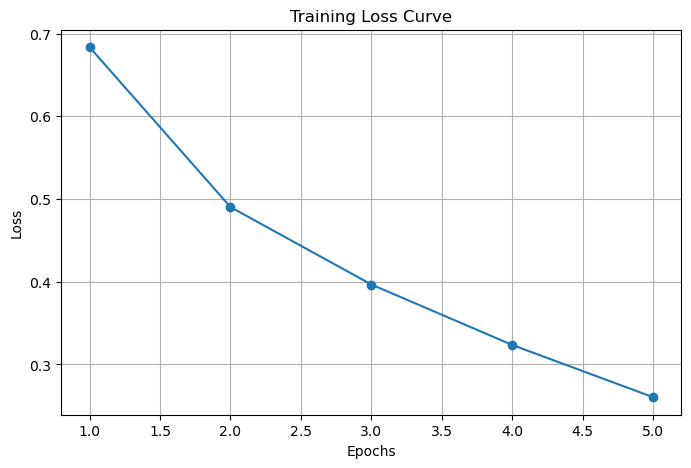

In [16]:
from tqdm import tqdm
import matplotlib.pyplot as plt

epochs = 5
train_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    for images, labels in tqdm(train_image_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_image_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {epoch_loss:.4f}")

# Plot training loss
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_losses, marker='o')
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [17]:
# torch.save(model.state_dict(), "new_model1.pth")

In [18]:
for images, labels in test_image_loader:
    print(labels.size)
    break

<built-in method size of Tensor object at 0x71e858051a90>


Epoch 1, Val Accuracy = 86.70%
Epoch 2, Val Accuracy = 86.70%
Epoch 3, Val Accuracy = 86.70%
Epoch 4, Val Accuracy = 86.70%
Epoch 5, Val Accuracy = 86.70%


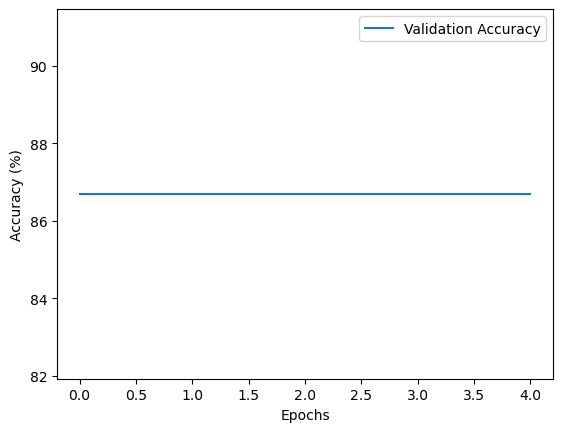

In [20]:
val_accuracies = []

for epoch in range(epochs):
    model.train()
    for images, labels in train_image_loader:
        # training steps here
        pass

    # ------ VALIDATION ------
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_image_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_acc = 100 * correct / total
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}, Val Accuracy = {val_acc:.2f}%")

# ---- Plot after loop ----
plt.plot(val_accuracies, label="Validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.show()


In [ ]:
# plt.plot(val_accuracies, label="Validation Accuracy", color="orange")
# plt.legend()

Accuracy:  0.8670
Precision: 0.8706
Recall:    0.8670
F1 Score:  0.8663

Classification Report:
               precision    recall  f1-score   support

         dog       0.89      0.82      0.85      2494
         cat       0.84      0.93      0.88      2498
      person       0.96      0.76      0.85       307

    accuracy                           0.87      5299
   macro avg       0.90      0.84      0.86      5299
weighted avg       0.87      0.87      0.87      5299



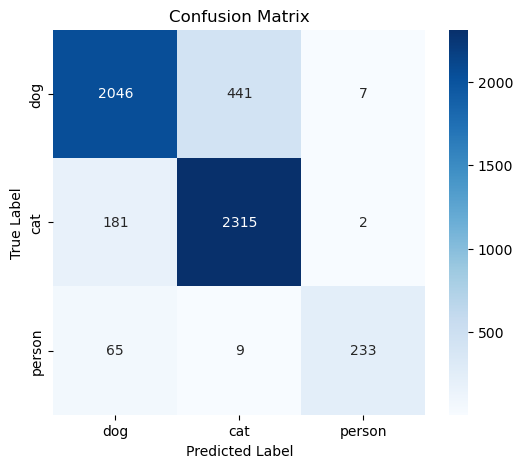

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_image_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=list(train_image_dataset.class_name.values())))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(train_image_dataset.class_name.values()),
            yticklabels=list(train_image_dataset.class_name.values()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


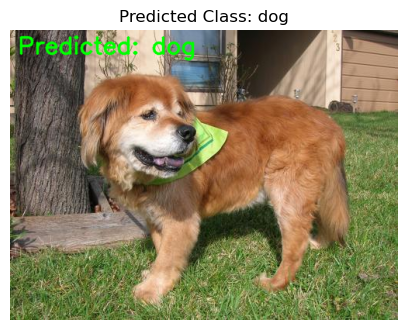

Predicted Class: dog


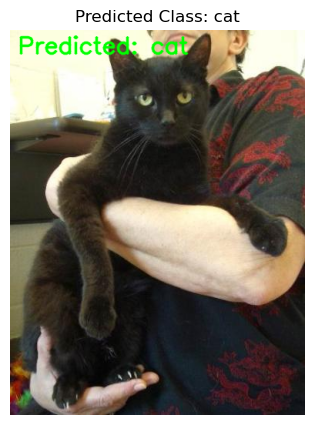

Predicted Class: cat


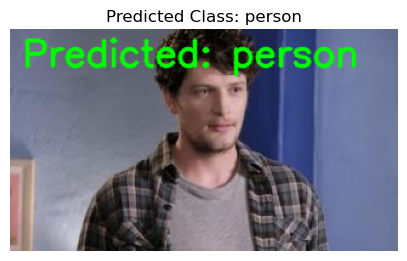

Predicted Class: person


In [17]:
import cv2
import matplotlib.pyplot as plt

class ImageClassifier:
    def __init__(self, model_path, class_names):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = CustomCnnModel(input_dim=128, num_classes=len(class_names)).to(self.device)
        self.model.load_state_dict(torch.load(model_path, map_location=self.device))
        self.model.eval()
        self.class_names = class_names
        self.transform = transforms.Compose([
            transforms.Resize((128, 128)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        ])

    def predict(self, image_path):
        # Load and preprocess image
        image = Image.open(image_path).convert("RGB")
        input_tensor = self.transform(image).unsqueeze(0).to(self.device)
        
        # Forward pass
        with torch.no_grad():
            output = self.model(input_tensor)
            _, predicted = torch.max(output, 1)
        
        predicted_class = self.class_names[predicted.item()]
        
        # Display the image with label
        img_cv = cv2.imread(image_path)
        img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img_cv, f"Predicted: {predicted_class}", (10, 30),
                    font, 1, (0, 255, 0), 2, cv2.LINE_AA)
        
        plt.figure(figsize=(5,5))
        plt.imshow(img_cv)
        plt.axis("off")
        plt.title(f"Predicted Class: {predicted_class}")
        plt.show()
        
        return predicted_class


classifier = ImageClassifier(
    "/home/td/Doc/Prog/Ai|Ml/pytorch/new_model1.pth",
    train_image_dataset.class_name
)

test_image_path1 = "Dataset/merged_dataset/test/dog/178.jpg"
test_image_path2 = "Dataset/merged_dataset/test/cat/352.jpg"
test_image_path3 = "Dataset/merged_dataset/test/person/524.jpg"


predicted_label = classifier.predict(test_image_path1)
print(f"Predicted Class: {predicted_label}")
predicted_label = classifier.predict(test_image_path2)
print(f"Predicted Class: {predicted_label}")
predicted_label = classifier.predict(test_image_path3)
print(f"Predicted Class: {predicted_label}")

